In [1]:
from bs4 import BeautifulSoup

In [2]:
with open("Mobiles.html", "r", encoding="utf-8") as f:
    content = f.read()

soup = BeautifulSoup(content, "html.parser")

In [59]:
items = []

for i, mobile in enumerate(soup.find_all("div", {"role": "listitem"})):
    title_div = mobile.find("div", {"data-cy": "title-recipe"})
    
    if title_div:
        title_span = title_div.find("span")
        
        if title_span:
            title = title_span.text.strip()
            # Skip if it's just 'Sponsored' repeated or garbage
            if "Sponsored" in title:
                continue

            review_div = mobile.find("div", {"data-cy": "reviews-block"})
            price_div = mobile.find("div", {"data-cy": "price-recipe"})
            
            rating = review_div.find("span").text[:3]
            purchase = review_div.find_all("span")[2].text
            
            price = price_div.find("span", class_="a-price").span.text
            offer_div = price_div.find_all("span")
            offer = offer_div[len(offer_div)-1].text
            
            if offer == "" or offer == " with coupon":
                offer = "(5% off)"

            item = {
                "Title": title,
                "Price (₹)": price[1:],
                "Rating": rating,
                "Purchase Count": purchase,
                "Offer (% off)": offer.split("%")[0][1:]
            }

            items.append(item)
            

In [60]:
items

[{'Title': 'iQOO Z10x 5G (Ultramarine, 6GB RAM, 128GB Storage) | 6500 mAh Large Capacity Battery | Dimensity 7300 Processor | Military-Grade Durability',
  'Price (₹)': '13,499',
  'Rating': '4.3',
  'Purchase Count': '1,672',
  'Offer (% off)': '23'},
 {'Title': 'Motorola G45 5G (Brilliant Blue, 8GB RAM, 128GB Storage)',
  'Price (₹)': '11,999',
  'Rating': '4.0',
  'Purchase Count': '790',
  'Offer (% off)': '20'},
 {'Title': 'realme NARZO 80 Lite 5G (Crystal Purple, 6GB+128GB) | 6000mAh Long-Lasting Battery | MediaTek Dimensity 6300 5G | AI Assist | IP64 Rated Water & Dust Resistance | Military-Grade Durability',
  'Price (₹)': '11,499',
  'Rating': '4.9',
  'Purchase Count': '28',
  'Offer (% off)': '5'},
 {'Title': 'Motorola G45 5G (Viva Magenta, 8GB RAM, 128GB Storage)',
  'Price (₹)': '12,090',
  'Rating': '4.0',
  'Purchase Count': '377',
  'Offer (% off)': '19'},
 {'Title': 'iQOO Z9s 5G (Titanium Matte, 8GB RAM, 128GB Storage) | 120 Hz 3D Curved AMOLED Display | 5500 mAh Ultra

In [61]:
import pandas as pd
df = pd.DataFrame(items)

In [62]:
df

,Title,Price (₹),Rating,Purchase Count,Offer (% off)
0,"iQOO Z10x 5G (Ultramarine, 6GB RAM, 128GB Stor...","13,499",4.3,"1,672",23
1,"Motorola G45 5G (Brilliant Blue, 8GB RAM, 128G...","11,999",4.0,790,20
2,"realme NARZO 80 Lite 5G (Crystal Purple, 6GB+1...","11,499",4.9,28,5
3,"Motorola G45 5G (Viva Magenta, 8GB RAM, 128GB ...","12,090",4.0,377,19
4,"iQOO Z9s 5G (Titanium Matte, 8GB RAM, 128GB St...","18,999",4.4,"5,409",5
5,"OnePlus Nord CE4 Lite 5G (Super Silver, 8GB RA...","17,997",4.1,"7,213",10
6,"iQOO Z9x 5G (Tornado Green, 6GB RAM, 128GB Sto...","11,499",4.2,"9,378",5
7,"Samsung Galaxy M35 5G (Daybreak Blue,6GB RAM,1...","16,999",4.1,"11,115",5
8,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...","6,249",4.0,"4,329",5
9,"Redmi A4 5G (Sparkle Purple, 4GB RAM, 128GB St...","9,498",3.9,"4,092",21


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           16 non-null     object
 1   Price (₹)       16 non-null     object
 2   Rating          16 non-null     object
 3   Purchase Count  16 non-null     object
 4   Offer (% off)   16 non-null     object
dtypes: object(5)
memory usage: 772.0+ bytes


In [65]:
df["Price (₹)"] = df["Price (₹)"].str.replace(",", "").astype(float)

In [66]:
df["Rating"] = df["Rating"].astype(float)

In [68]:
df["Purchase Count"] = df["Purchase Count"].str.replace(",", "").astype(int)

In [69]:
df["Offer (% off)"] = df["Offer (% off)"].astype(float)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           16 non-null     object 
 1   Price (₹)       16 non-null     float64
 2   Rating          16 non-null     float64
 3   Purchase Count  16 non-null     int32  
 4   Offer (% off)   16 non-null     float64
dtypes: float64(3), int32(1), object(1)
memory usage: 708.0+ bytes


In [71]:
df

,Title,Price (₹),Rating,Purchase Count,Offer (% off)
0,"iQOO Z10x 5G (Ultramarine, 6GB RAM, 128GB Stor...",13499.0,4.3,1672,23.0
1,"Motorola G45 5G (Brilliant Blue, 8GB RAM, 128G...",11999.0,4.0,790,20.0
2,"realme NARZO 80 Lite 5G (Crystal Purple, 6GB+1...",11499.0,4.9,28,5.0
3,"Motorola G45 5G (Viva Magenta, 8GB RAM, 128GB ...",12090.0,4.0,377,19.0
4,"iQOO Z9s 5G (Titanium Matte, 8GB RAM, 128GB St...",18999.0,4.4,5409,5.0
5,"OnePlus Nord CE4 Lite 5G (Super Silver, 8GB RA...",17997.0,4.1,7213,10.0
6,"iQOO Z9x 5G (Tornado Green, 6GB RAM, 128GB Sto...",11499.0,4.2,9378,5.0
7,"Samsung Galaxy M35 5G (Daybreak Blue,6GB RAM,1...",16999.0,4.1,11115,5.0
8,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...",6249.0,4.0,4329,5.0
9,"Redmi A4 5G (Sparkle Purple, 4GB RAM, 128GB St...",9498.0,3.9,4092,21.0


In [72]:
df.describe()

,Price (₹),Rating,Purchase Count,Offer (% off)
count,16.000000,16.000000,16.000000,16.000000
mean,13956.125000,4.137500,3539.312500,14.500000
std,4248.312808,0.265518,3466.783134,11.944315
min,6249.000000,3.800000,28.000000,5.000000
25%,11499.000000,4.000000,572.750000,5.000000
50%,13249.000000,4.100000,2882.000000,7.500000
75%,17248.500000,4.225000,5409.000000,21.250000
max,20999.000000,4.900000,11115.000000,42.000000


In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

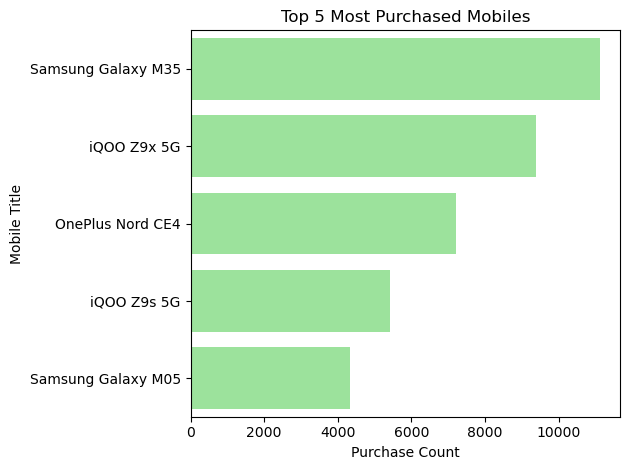

In [103]:
# 5 Most purchased Mobiles
top_purchased = df.sort_values(by="Purchase Count", ascending=False).head(6)

sns.barplot(data=top_purchased, y="Short Title", x="Purchase Count", color="lightgreen")
plt.title("Top 5 Most Purchased Mobiles")
plt.xlabel("Purchase Count")
plt.ylabel("Mobile Title")
plt.tight_layout()
plt.show()

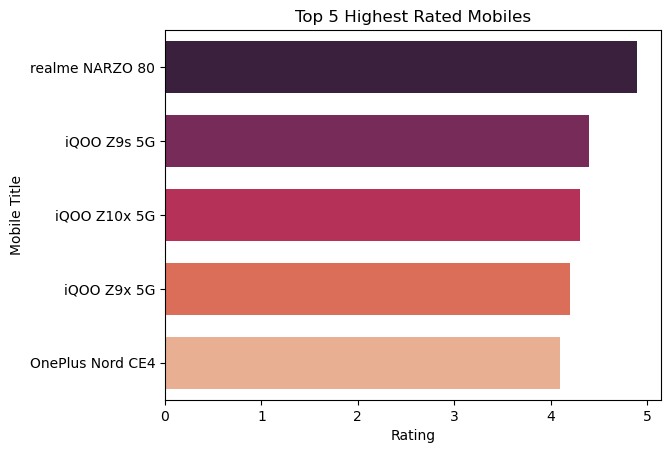

In [102]:
# 5 Most Rated Mobiles
top_rated = df.sort_values(by="Rating", ascending=False).head(6)

sns.barplot(data=top_rated, y="Short Title", x="Rating", hue="Short Title", palette="rocket", width=0.7)
plt.title("Top 5 Highest Rated Mobiles")
plt.xlabel("Rating")
plt.ylabel("Mobile Title")
plt.show()

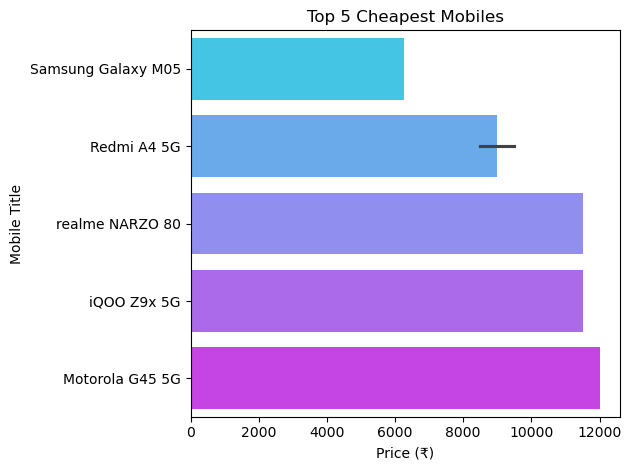

In [101]:
# Mobiles Price (Low to High)
cheapest = df.sort_values(by="Price (₹)").head(6)

sns.barplot(data=cheapest, y="Short Title", x="Price (₹)", hue="Short Title", palette="cool")
plt.title("Top 5 Cheapest Mobiles")
plt.xlabel("Price (₹)")
plt.ylabel("Mobile Title")
plt.tight_layout()
plt.show()

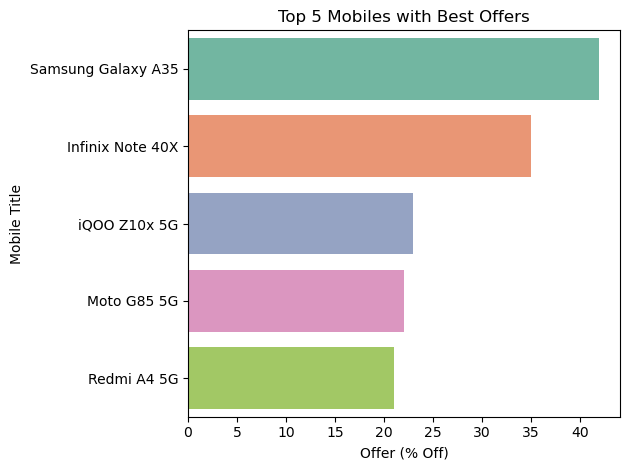

In [97]:
# Top 5 Best offers
best_offer = df.sort_values(by="Offer (% off)", ascending=False).head(5)

sns.barplot(data=best_offer, y="Short Title", x="Offer (% off)", hue="Short Title", palette="Set2")
plt.title("Top 5 Mobiles with Best Offers")
plt.xlabel("Offer (% Off)")
plt.ylabel("Mobile Title")
plt.tight_layout()
plt.show()

In [83]:
df["Short Title"] = df["Title"].apply(lambda x: " ".join(x.split()[:3]))

In [86]:
df

,Title,Price (₹),Rating,Purchase Count,Offer (% off),Short Title
0,"iQOO Z10x 5G (Ultramarine, 6GB RAM, 128GB Stor...",13499.0,4.3,1672,23.0,iQOO Z10x 5G
1,"Motorola G45 5G (Brilliant Blue, 8GB RAM, 128G...",11999.0,4.0,790,20.0,Motorola G45 5G
2,"realme NARZO 80 Lite 5G (Crystal Purple, 6GB+1...",11499.0,4.9,28,5.0,realme NARZO 80
3,"Motorola G45 5G (Viva Magenta, 8GB RAM, 128GB ...",12090.0,4.0,377,19.0,Motorola G45 5G
4,"iQOO Z9s 5G (Titanium Matte, 8GB RAM, 128GB St...",18999.0,4.4,5409,5.0,iQOO Z9s 5G
5,"OnePlus Nord CE4 Lite 5G (Super Silver, 8GB RA...",17997.0,4.1,7213,10.0,OnePlus Nord CE4
6,"iQOO Z9x 5G (Tornado Green, 6GB RAM, 128GB Sto...",11499.0,4.2,9378,5.0,iQOO Z9x 5G
7,"Samsung Galaxy M35 5G (Daybreak Blue,6GB RAM,1...",16999.0,4.1,11115,5.0,Samsung Galaxy M35
8,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...",6249.0,4.0,4329,5.0,Samsung Galaxy M05
9,"Redmi A4 5G (Sparkle Purple, 4GB RAM, 128GB St...",9498.0,3.9,4092,21.0,Redmi A4 5G


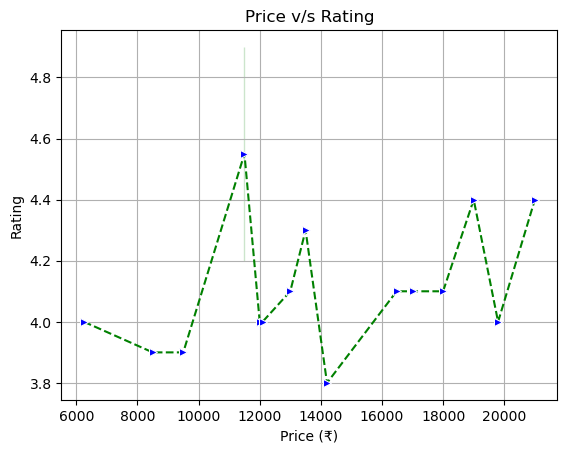

In [108]:
sns.lineplot(x="Price (₹)", y="Rating", data=df, marker=">", color="g", mfc="b", linestyle="--")
plt.title("Price v/s Rating")
plt.grid(True)

In [110]:
df.drop("Short Title", axis=1).to_excel("data.xlsx", index=False)